In [3]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- --------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [1]:
# Load the cleaned data with features from the CSV file
import pandas as pd

# File path to the processed data
csv_file_path = '../data/processed/brent_engineered_features.csv'

# Load the data into a DataFrame
data = pd.read_csv(csv_file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the dataframe
data.head()

,Date,Price,Price_MA30,Price_MA90,Price_Rolling_STD30,Price_Rolling_STD90,Price_Lag1,Price_Lag7,Price_Lag30,Log_Returns
0,1987-07-02,19.25,18.810333,18.804516,0.209605,0.208612,18.98,18.90,18.63,0.014125
1,1987-07-03,19.33,18.839667,18.820938,0.218813,0.225265,19.25,18.75,18.45,0.004147
2,1987-07-06,19.48,18.870667,18.840909,0.241103,0.249642,19.33,18.70,18.55,0.007730
3,1987-07-07,19.50,18.900667,18.860294,0.261401,0.270572,19.48,19.08,18.60,0.001026
4,1987-07-08,19.48,18.929000,18.878000,0.276672,0.286406,19.50,19.15,18.63,-0.001026


In [6]:
from sklearn.model_selection import train_test_split

# Features and target variable
features = data[['Price_MA30', 'Price_MA90', 'Price_Rolling_STD30', 'Price_Rolling_STD90', 'Price_Lag1', 'Price_Lag7', 'Price_Lag30']]
target = data['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (7184, 7)
Test set shape: (1797, 7)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(y_train, order=(5, 1, 0))  # (p, d, q) order
arima_model = model.fit()

print(arima_model.summary())

## 📈 ARIMA Time Series Forecasting Report

### 🔧 Model Setup

* **Model Used**: ARIMA (AutoRegressive Integrated Moving Average)
* **Library**: `statsmodels.tsa.arima.model.ARIMA`
* **Order (p, d, q)**: (5, 1, 0)

ADF p-value: 0.3821403332052913


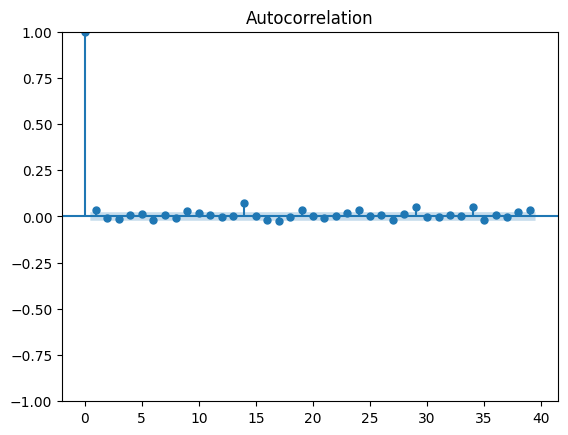

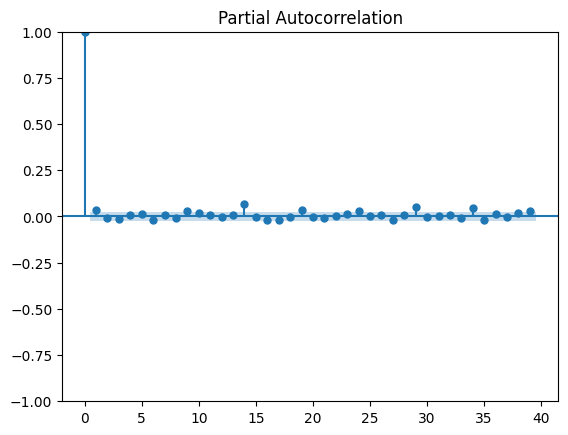

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 7184
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10623.950
Date:                Mon, 04 Aug 2025   AIC                          21259.901
Time:                        13:47:21   BIC                          21301.177
Sample:                             0   HQIC                         21274.105
                               - 7184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0373      0.008      4.940      0.000       0.022       0.052
ar.L2         -0.0078      0.007     -1.138      0.255      -0.021       0.006
ar.L3         -0.0114      0.007     -1.721      0.0

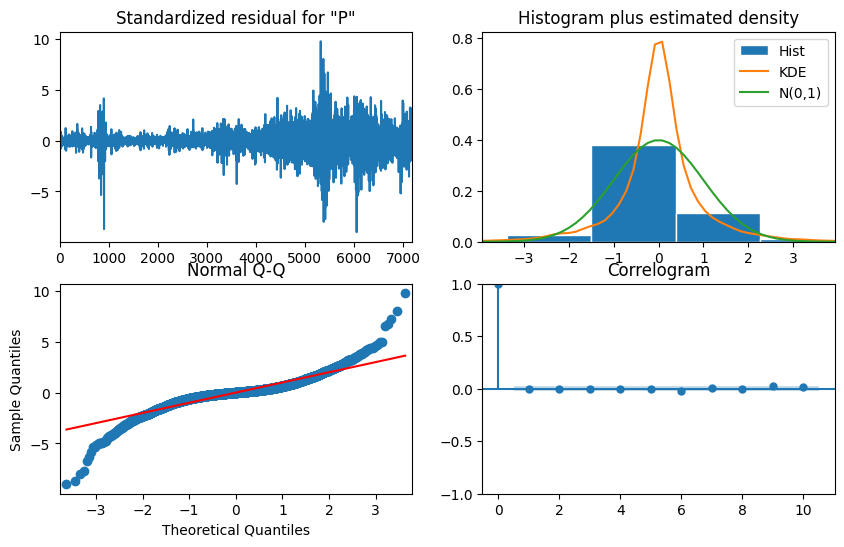

In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Stationarity check
adf_result = adfuller(y_train)
print(f"ADF p-value: {adf_result[1]}")

# Optional: Plot ACF and PACF
plot_acf(y_train.diff().dropna())
plot_pacf(y_train.diff().dropna())
plt.show()

# Fit ARIMA
model = ARIMA(y_train, order=(5, 1, 0))
arima_model = model.fit()
print(arima_model.summary())
arima_model.plot_diagnostics(figsize=(10, 6))
plt.show()


# Evaluate the ARIMA model 

📉 Mean Squared Error (MSE): 692.18
📈 Root Mean Squared Error (RMSE): 26.31
📊 Mean Absolute Error (MAE): 19.79


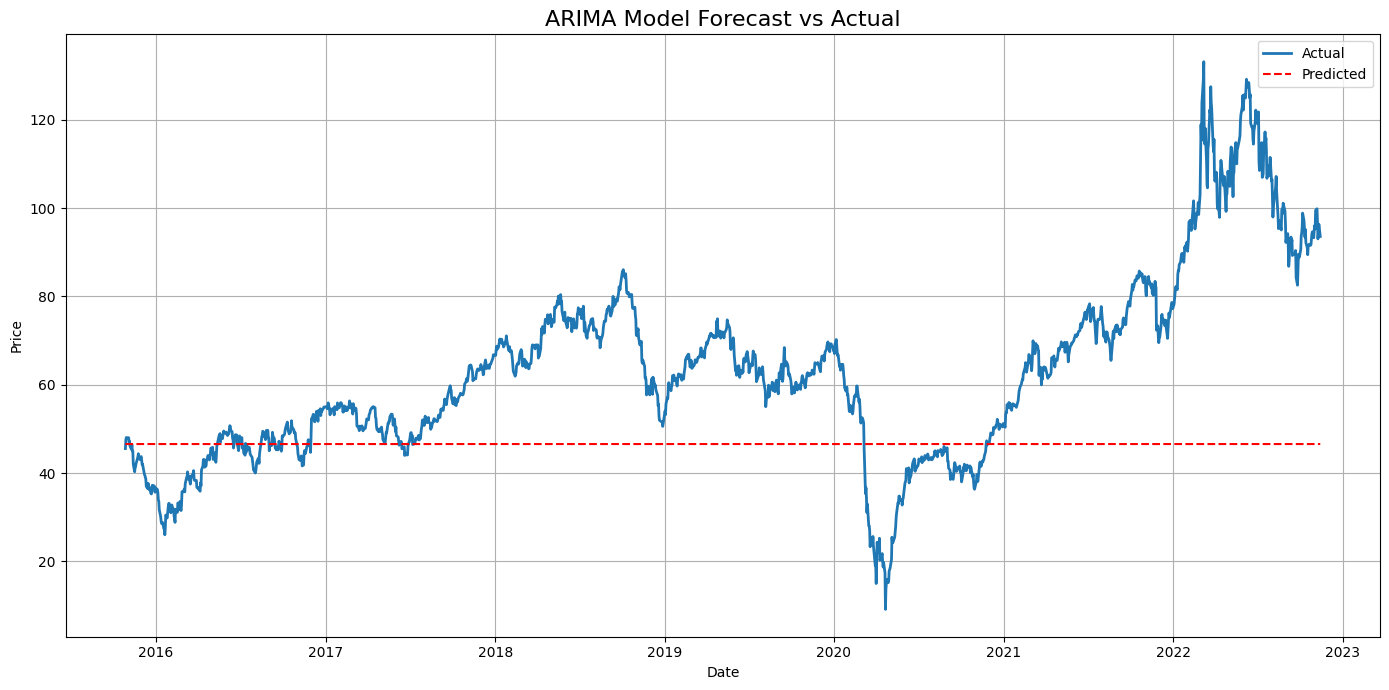

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# === Forecast ===
forecast_steps = len(y_test)
y_pred = arima_model.forecast(steps=forecast_steps)

# === Evaluation Metrics ===
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📊 Mean Absolute Error (MAE): {mae:.2f}")

# === Plot: Actual vs Predicted ===
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][-forecast_steps:], y_test, label='Actual', linewidth=2)
plt.plot(data['Date'][-forecast_steps:], y_pred, label='Predicted', color='red', linestyle='--')
plt.title('ARIMA Model Forecast vs Actual', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Confidence Intervals

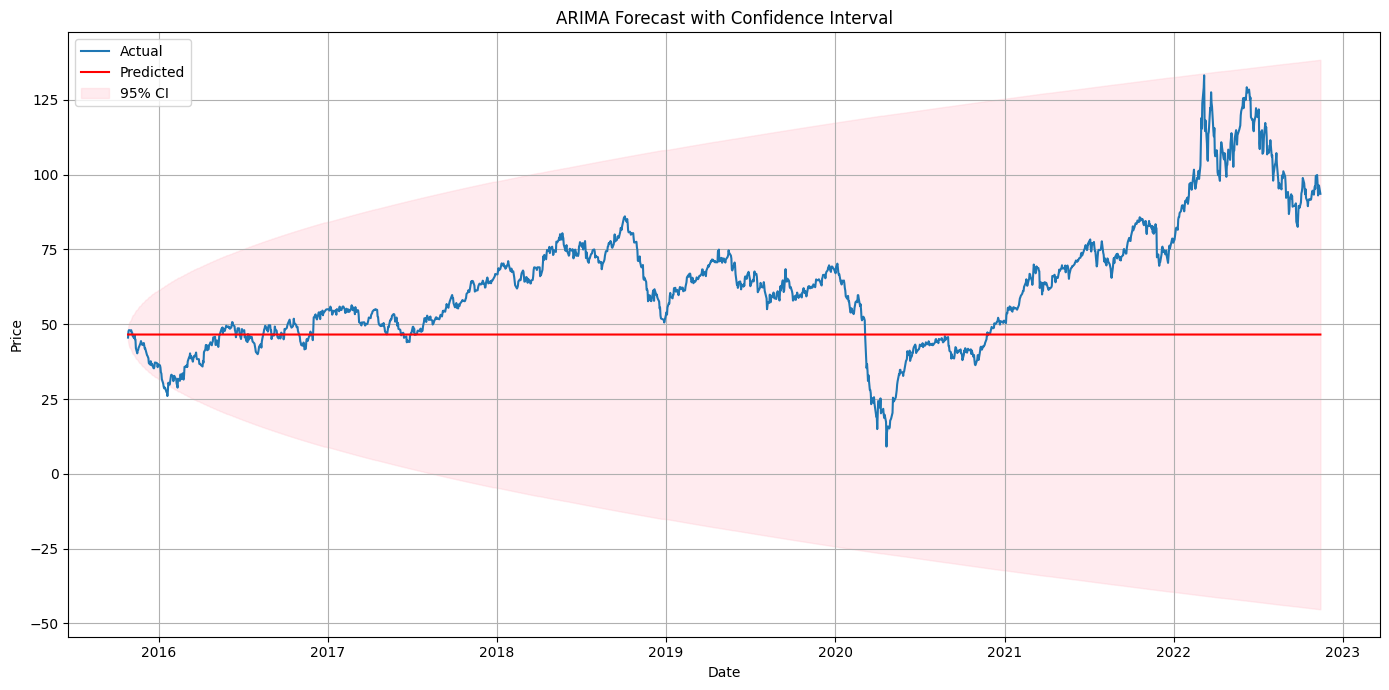

In [12]:
pred = arima_model.get_forecast(steps=forecast_steps)
pred_mean = pred.predicted_mean
conf_int = pred.conf_int()

# Plot with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(data['Date'][-forecast_steps:], y_test, label='Actual')
plt.plot(data['Date'][-forecast_steps:], pred_mean, label='Predicted', color='red')
plt.fill_between(data['Date'][-forecast_steps:], 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% CI')
plt.title('ARIMA Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
